# Online Video Game Store Campaign
Project Report by Allentine Paulis

# Table of Contents
* [Project Description](#description)
* [Data](#data)
* [Step 1. Understanding Data](#understanding)
* [Step 2. Data Preprocessing](#preprocessing)   
* [Step 3. Exploratory data analysis](#eda)
* [Step 4. Regional analysis](#region)
* [Step 5. Hypotheses Testing](#hypotest)
    * [Hypothesis 1](#hypo1)
    * [Hypothesis 2](#hypo2)
* [Step 6. Overall conclusion](#allconclusion)

# Project Description <a class="anchor" id="description"></a>
The project is as an analyst for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2027 sales based on data from 2026.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

# Data <a class="anchor" id="data"></a>

—*Name*

—*Platform*

—*Year_of_Release*

—*Genre*

—*NA_sales* (North American sales in USD million)

—*EU_sales* (sales in Europe in USD million)

—*JP_sales* (sales in Japan in USD million)

—*Other_sales* (sales in other countries in USD million)

—*Critic_Score* (maximum of 100)

—*User_Score* (maximum of 10)

—*Rating* (ESRB)

Data for 2016 may be incomplete.

Rating guide ESRB can be found https://www.esrb.org/ratings-guide/ or https://www.ign.com/wikis/content-ratings/ESRB
- E - Everyone (6+)
- T - Teen (13+)
- M - Mature (17+)
- E10+ - Everyone 10+ (10+)
- EC - Early Childhood (3+)
- RP - Rating Pending (?+)
- K-A - Kids to Adult
- AO - Adults Only (18+)

## Step 1. Understanding Data  <a class="anchor" id="understanding"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/games.csv")

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [7]:
df.loc[df['Name']=='Need for Speed: Most Wanted']

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [8]:
original_length = len(df)
original_length

16715

In [9]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [10]:
df.isna().sum()/ len(df) * 100

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [11]:
df['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [12]:
df['Platform'].nunique()

31

In [13]:
df['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [14]:
df['Genre'].nunique()

12

In [15]:
df['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [16]:
df['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.9       2
1.1       2
0.5       2
9.7       1
0         1
Name: User_Score, Length: 96, dtype: int64

In [17]:
df['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [18]:
df['Name'].nunique()

11559

In [19]:
df['Year_of_Release'].nunique()

37

In [20]:
df['Year_of_Release'].min()

1980.0

In [21]:
df['Year_of_Release'].max()

2016.0

In [22]:
df.duplicated().sum()

0

### Conclusion

- There are 8578 rows or 51.3% missing values of Critic_Score
- There are 6701 rows or 40% missing values of User_Score
- There are 6766 rows or 40.47% missing values of Rating
- There are 369 rows or 1.61% missing values from Year_of_Release
- There are only 2 rows missing values of Name
- There are only 2 rows missing values of Genre


- User_Score has 2424 tbd vallues
- There are 12 genres, can be change to lower case
- There are 31 platform, it can be change into categorical with console company, for example NES, SNES, 3DS, Wii is categorized as Nintendo.
- There are 8 Rating
- There are 11559 unique Game Name as total of 16713 Name. There are same game name but with different platform and year.
- There are 37 year of release from 1980 to 2016. 


- Year_of_Release can be changed to integer
- Critic_Score data types can be changed into integer
- User_Score data types can be changed into float since the range value is between 0-10 with decimals included
- Column names can be changed into lower case


- Game of Need for Speed : Most Wanted is the most popular game with 12 releases of different platform and different year of release
- PS2 is the most popular platform with 2161 counts
- Action is most popular genre
- Rating ESRB E (Everyone) is the most rating score

## Step 2. Data Preprocessing  <a class="anchor" id="preprocessing"></a>

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
    - Explain why you filled in the missing values as you did or why you decided to leave them blank.
    - Why do you think the values are missing? Give possible reasons.
    - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

### Replace the column names (make them lowercase).

In [23]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [24]:
df.columns = df.columns.str.lower()

In [25]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [26]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [27]:
df['genre'] = df['genre'].str.lower()

In [28]:
df['genre'].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

### Convert the data to the required types. Describe the columns where the data types have been changed and why.

In [29]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

int32 or int64 can do data type change even with the nulls

In [30]:
df['year_of_release'] = df['year_of_release'].astype('Int64')

User_Score data types can be changed from object into float since the range value is between 0-10 with decimals included, and the float data types will allow numerical analysis.

When trying to convert user_score to float, it could not convert string to float : 'tbd'. This 'tbd' needs to be replaced by null or NaN

In [31]:
df['user_score'] = np.where(df['user_score'] == 'tbd', np.nan, df['user_score'])

In [32]:
df['user_score'] = df['user_score'].astype(float)

Critic_score is changed from float to int since the range is 0-100 and there is no decimals value

In [33]:
df['critic_score'] = df['critic_score'].astype('Int64')

In [34]:
df.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

### Deal with missing values

In [35]:
original_length

16715

Column Name has 2 rows missing values and will be dropped

In [36]:
df = df.dropna(subset=['name']) 
len(df)

16713

In [37]:
df['year_of_release'].isna().sum()/original_length*100

1.609332934489979

Year_of_Release has 1.6% missing values so we can drop it

In [38]:
df = df.dropna(subset=['year_of_release']) 
len(df)

16444

In [39]:
(1-(len(df)/original_length))*100

1.6212982351181626

In [40]:
(len(df)/original_length)*100

98.37870176488184

Total data drop from name and year of release is 1.62%, so we still have 98.37% data

Critic_Score, User_Score and Rating has very large missing values so we can't drop them since we will lose so many information. It needs more information and investigation why it has large missing values.

In [41]:
df.loc[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
5,Tetris,GB,1989,puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN
9,Duck Hunt,NES,1984,shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN
10,Nintendogs,DS,2005,simulation,9.05,10.95,1.93,2.74,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


is there null association between critic score and genre?

In [42]:
df.loc[df['critic_score'].isna()]['genre'].value_counts()/original_length *100

action          8.710739
misc            7.250972
sports          6.826204
adventure       5.821119
role-playing    4.486988
simulation      3.045169
racing          2.997308
fighting        2.584505
platform        2.321268
strategy        2.255459
shooter         2.231529
puzzle          2.087945
Name: genre, dtype: float64

is there null association between critic score and platform?

In [43]:
df.loc[df['critic_score'].isna()]['platform'].value_counts()/original_length *100

DS      8.453485
PS      5.946754
PS2     5.097218
PSP     4.409213
Wii     4.295543
PS3     3.003290
GBA     2.279390
3DS     2.069997
X360    2.022136
N64     1.890517
PSV     1.854622
PC      1.543524
SNES    1.429853
SAT     1.034999
PS4     0.837571
2600    0.693987
GC      0.628178
NES     0.586300
XB      0.580317
GB      0.580317
XOne    0.466647
WiiU    0.341011
DC      0.227341
GEN     0.161532
NG      0.071792
WS      0.035896
SCD     0.035896
3DO     0.017948
TG16    0.011965
GG      0.005983
PCFX    0.005983
Name: platform, dtype: float64

is there null association between critic score and year of release?

In [44]:
df.loc[df['critic_score'].isna()]['year_of_release'].value_counts()/original_length *100

2009    4.636554
2010    4.516901
2008    4.259647
2011    3.804966
2007    3.021238
2006    2.309303
2015    2.279390
1998    2.099910
2012    1.986240
2014    1.914448
1999    1.788812
2005    1.699073
1997    1.627281
2013    1.621298
2016    1.615316
1996    1.525576
1995    1.310200
2000    1.238409
2002    1.208495
2004    1.202513
2003    1.136704
2001    0.933293
1994    0.717918
1993    0.358959
1981    0.275202
1992    0.251271
1991    0.245289
1982    0.215375
1986    0.125636
1989    0.101705
1983    0.101705
1987    0.095722
1990    0.095722
1984    0.083757
1988    0.083757
1985    0.077774
1980    0.053844
Name: year_of_release, dtype: float64

is there null association between rating and year of release?

In [45]:
df.loc[df['rating'].isna()]['year_of_release'].value_counts().sort_values()

1980      9
1985     13
1984     14
1988     14
1987     16
1990     16
1989     17
1983     17
1986     21
1982     36
1991     41
1992     41
1981     46
1993     60
1994    120
2001    143
2003    162
2004    164
2002    174
2000    202
1995    219
2016    222
2013    228
2005    233
2014    236
1996    256
1997    270
2015    291
1999    296
2012    298
2006    328
1998    347
2007    376
2009    415
2011    433
2008    446
2010    456
Name: year_of_release, dtype: Int64

In [46]:
df.loc[df['rating'].isna()]['platform'].value_counts()

PS      986
DS      866
PS2     671
PSP     657
PS3     371
N64     316
Wii     309
GBA     297
3DS     289
PSV     279
SNES    239
X360    202
PC      200
SAT     173
PS4     137
2600    116
NES      98
GB       97
XB       89
GC       85
XOne     61
WiiU     42
DC       38
GEN      27
NG       12
WS        6
SCD       6
3DO       3
TG16      2
GG        1
PCFX      1
Name: platform, dtype: int64

There are no clear association for the large missing values. Maybe for the Rating, since ESRB is United States rating system, maybe the missing values are for  non-US game products. 

### Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [47]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [48]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


### Other Data Preprocessing

Add Platform Company Category

In [49]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [50]:
def platform_company(x):
    if x in ('Wii', 'NES','GB','DS', 'SNES','GBA','3DS','N64','WiiU','GC'): 
        return 'Nintendo'
    elif x in ('X360','XB','XOne'):
        return 'Microsoft'
    elif x in ('PS3','PS2','PS4','PS','PSP','PSV'):
        return 'Sony'
    elif x in ('GEN','DC','SAT','SCD','GG'):
        return 'Sega'
    elif x in ('PC'):
        return 'Unknown-PC'
    elif x in ('2600'):
        return 'Atari'
    elif x in ('WS'):
        return 'Bandai'
    elif x in ('NG'):
        return 'SNK'
    elif x in ('TG16', 'PCFX'):
        return 'NEC'
    elif x in '3DO':
        return '3DO'
    else:
        return 'Others'

In [51]:
df['platform_company'] = df['platform'].apply(platform_company)

In [52]:
df.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
8525,True Swing Golf,DS,2005,sports,0.11,0.00,0.04,0.01,66,7.7,E,0.16,Nintendo
1545,Silent Hill 2,PS2,2001,action,0.62,0.49,0.00,0.16,89,8.9,M,1.27,Sony
7722,Major League Baseball 2K12,PS3,2012,sports,0.18,0.00,0.00,0.02,68,4.4,E,0.20,Sony
9134,¡Shin Chan Flipa en colores!,DS,2007,platform,0.00,0.00,0.14,0.00,<NA>,NaN,NaN,0.14,Nintendo
12515,Mega Man Battle Network 5: Double Team DS (US ...,DS,2005,role-playing,0.06,0.00,0.00,0.00,<NA>,NaN,NaN,0.06,Nintendo
7219,Jackass the Game,PSP,2007,action,0.09,0.08,0.00,0.05,58,7.0,M,0.22,Sony
14008,Sherlock Holmes: Secret of The Silver Earring,Wii,2010,adventure,0.00,0.03,0.00,0.00,<NA>,NaN,NaN,0.03,Nintendo
11592,Evil Dead: Regeneration,XB,2005,action,0.06,0.02,0.00,0.00,66,NaN,M,0.08,Microsoft
10521,Colin McRae Rally 04,XB,2004,racing,0.08,0.02,0.00,0.00,84,8.1,E,0.10,Microsoft
2411,SingStar '90s,PS2,2007,misc,0.10,0.59,0.00,0.18,73,NaN,T,0.87,Sony


In [53]:
df['platform_company'].value_counts()

Sony          6637
Nintendo      6169
Microsoft     2282
Unknown-PC     957
Sega           259
Atari          116
SNK             12
Bandai           6
3DO              3
NEC              3
Name: platform_company, dtype: int64

### Conclusion

- Data types is fixed
- column names and column genre are changed to lower case
- year of release and name missing values are dropped
- Total data dropped from name and year of release is 1.62%, so we still have 98.37% data
- There are large missing values in critic score, user score and rating
- Maybe for the Rating, since ESRB is United States rating system, maybe the missing values are for non-US game products.
- We added two new columns which are total sales and platform company

## Step 3. Exploratory Data Analysis <a class="anchor" id="eda"></a>

Task:
1. Look at how many games were released in different years. Is the data for every period significant?
2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
3. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017. Work only with the data that you've decided is relevant. Disregard the data for previous years.
4. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
5. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
6. Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
7. Keeping your conclusions in mind, compare the sales of the same games on other platforms.
8. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

### 1. Look at how many games were released in different years. Is the data for every period significant?

In [54]:
df.groupby(['year_of_release'])['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

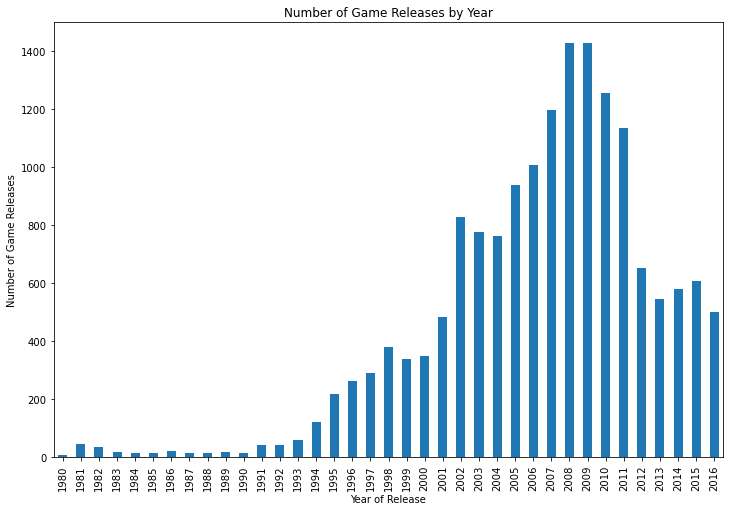

In [55]:
plt.figure(figsize=(12,8))
df.groupby(['year_of_release'])['name'].count().plot(kind='bar')
plt.title('Number of Game Releases by Year')
plt.xlabel("Year of Release")
plt.ylabel("Number of Game Releases")
plt.show()

- Before 1995, there were not lot of games, which make sense if there was less technology advanced during those period.  
- There were sharp increases after 1995, where the peak was in 2008 and 2009. 
- After 2010 and 2011, there was sharp decline in video game releases, which doesn't make sense since the technology was more developed and the video game industry became more booming until right now. Maybe the data after 2012 was not the representation of total games being developed at that time. And maybe it took video games industry longer to develop since the more technology advanced, it took more stuffs and more time to develop so there were not lot of game released. 

### 2. Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [56]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

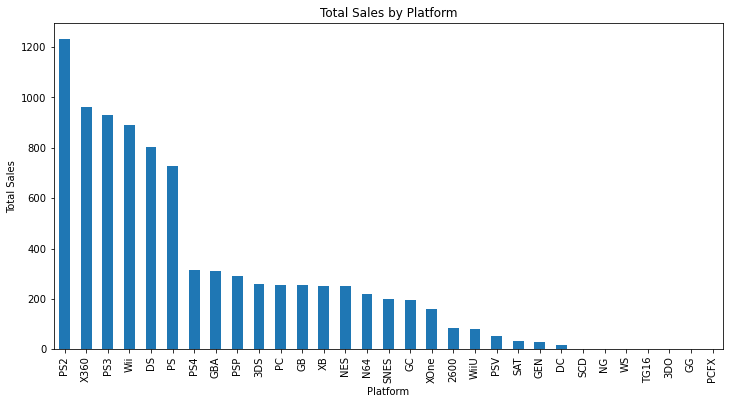

In [57]:
plt.figure(figsize=(12,6))
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

In [58]:
top10_platform = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10).reset_index()['platform'].to_list()
top10_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

The top 10 platform released in order are PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS

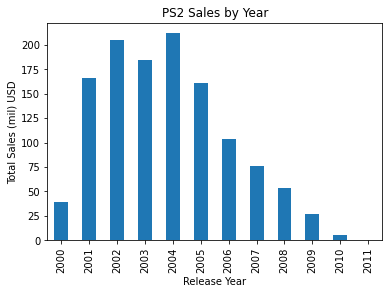

In [59]:
plt.title(top10_platform[0] + ' Sales by Year')
df.loc[df['platform']==top10_platform[0]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

PS2 was active for 11 years (2000 to 2011)

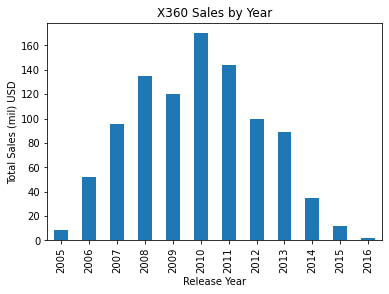

In [60]:
plt.title(top10_platform[1] + ' Sales by Year')
df.loc[df['platform']==top10_platform[1]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

X360 was active for 11 years (2005 to 2016)

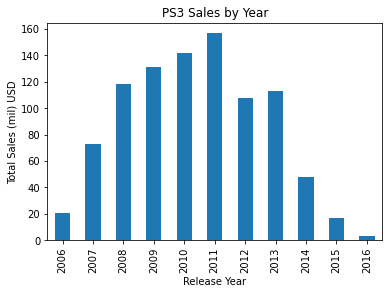

In [61]:
plt.title(top10_platform[2] + ' Sales by Year')
df.loc[df['platform']==top10_platform[2]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

PS3 was active for 10 years (2006 to 2016)

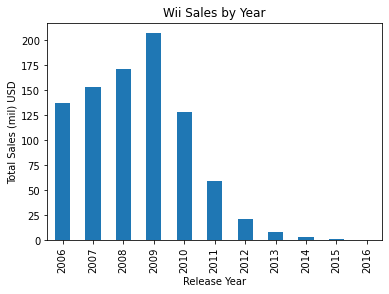

In [62]:
plt.title(top10_platform[3] + ' Sales by Year')
df.loc[df['platform']==top10_platform[3]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

Wii was active for 10 years (2006 to 2016)

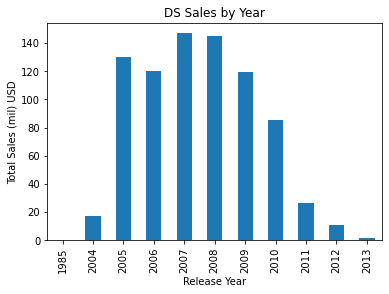

In [63]:
plt.title(top10_platform[4] + ' Sales by Year')
df.loc[df['platform']==top10_platform[4]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

DS was active for 9 years (2004 to 2013)

Based on google, DS was released in 2004. So this 1985 DS did not exist. This 1985 DS is going to be removed.

In [64]:
df.loc[((df['platform']=='DS') & (df['year_of_release']==1985))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
15957,Strongest Tokyo University Shogi DS,DS,1985,action,0.0,0.0,0.02,0.0,<NA>,NaN,NaN,0.02,Nintendo


In [65]:
df = df.drop([15957])

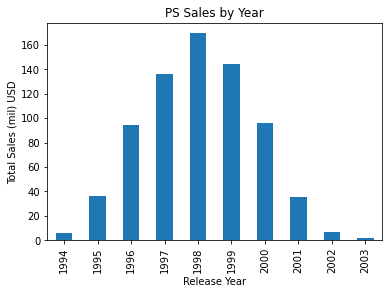

In [66]:
plt.title(top10_platform[5] + ' Sales by Year')
df.loc[df['platform']==top10_platform[5]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

PS was active for 9 years (1994 to 2003)

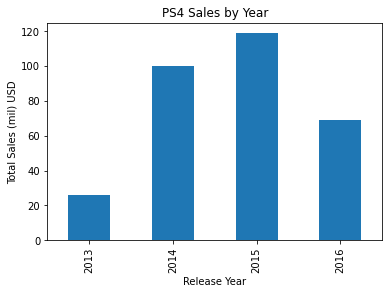

In [67]:
plt.title(top10_platform[6] + ' Sales by Year')
df.loc[df['platform']==top10_platform[6]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

PS4 was active for 3 years (2013 to 2016)

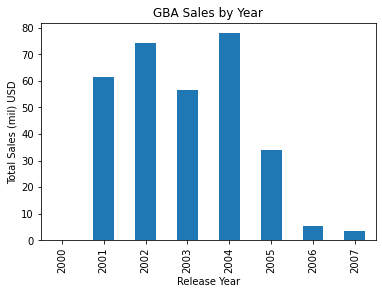

In [68]:
plt.title(top10_platform[7] + ' Sales by Year')
df.loc[df['platform']==top10_platform[7]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

GBA was active for 7 years (2000 to 2007)

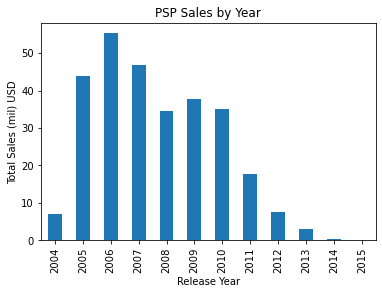

In [69]:
plt.title(top10_platform[8] + ' Sales by Year')
df.loc[df['platform']==top10_platform[8]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

PSP was active for 11 years (2004 to 2015)

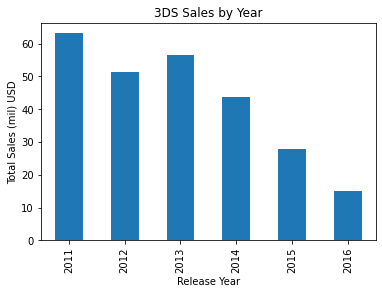

In [70]:
plt.title(top10_platform[9] + ' Sales by Year')
df.loc[df['platform']==top10_platform[9]].groupby(['year_of_release'])['total_sales'].sum().plot(kind='bar')
plt.xlabel("Release Year")
plt.ylabel("Total Sales (mil) USD")
plt.show()

3DS was active for 5 years (from 2011 to 2016)

In [71]:
top10 = df.loc[df['platform'].isin(top10_platform)].groupby(['platform'])['year_of_release'].agg({min, max}).reset_index()
top10['active_years'] = top10['max']-top10['min']
top10.sort_values(by='active_years', ascending=False)

,platform,max,min,active_years
4,PS2,2011,2000,11
7,PSP,2015,2004,11
9,X360,2016,2005,11
5,PS3,2016,2006,10
8,Wii,2016,2006,10
1,DS,2013,2004,9
3,PS,2003,1994,9
2,GBA,2007,2000,7
0,3DS,2016,2011,5
6,PS4,2016,2013,3


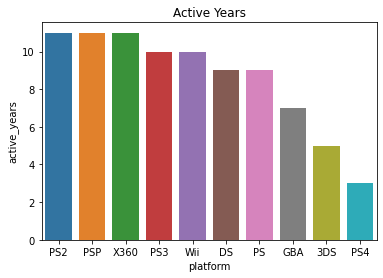

In [72]:
sns.barplot(x='platform',y='active_years',data=top10.sort_values(by='active_years', ascending=False))
plt.title('Active Years')
plt.show()

In [73]:
top10['active_years'].median()

9.5

In [74]:
top10['active_years'].mean()

8.6

- It takes about 9 years for new platform to fade.
- It took around 5 to 6 years for next console platform to appear. In this example PS appeared in 1994, PS2 appeared in 2000 and ps3 appeared in 2006. 
- ps2, psp, x360 are the most active life cycle (11 years active before fade)

### 3. Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017. Work only with the data that you've decided is relevant. Disregard the data for previous years.

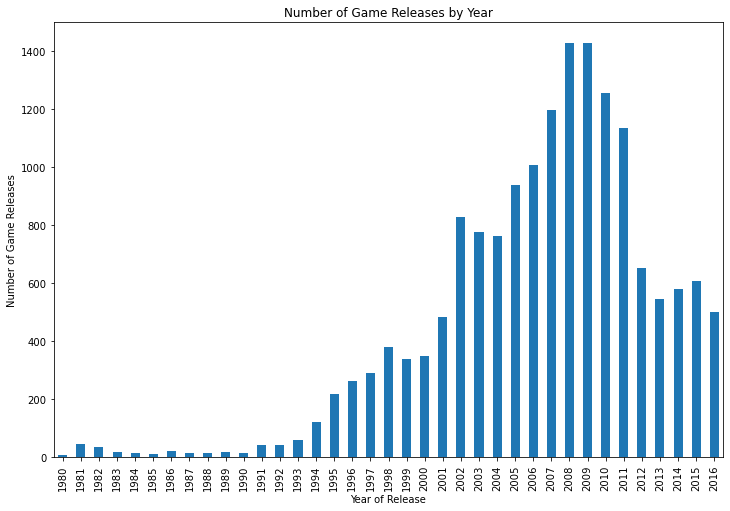

In [75]:
plt.figure(figsize=(12,8))
df.groupby(['year_of_release'])['name'].count().plot(kind='bar')
plt.title('Number of Game Releases by Year')
plt.xlabel("Year of Release")
plt.ylabel("Number of Game Releases")
plt.show()

Based on the most popular platform by total sales which is PS2 (2000 to 2011) and data distribution above, we can use data from 2000. 

In [76]:
original_df = df.copy()
df = df.loc[df['year_of_release']>=2000]

### 4. Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

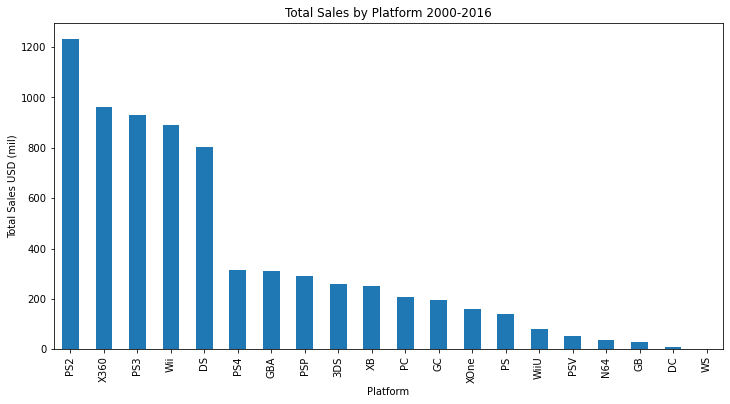

In [77]:
plt.figure(figsize=(12,6))
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Platform 2000-2016')
plt.xlabel("Platform")
plt.ylabel("Total Sales USD (mil)")
plt.show()

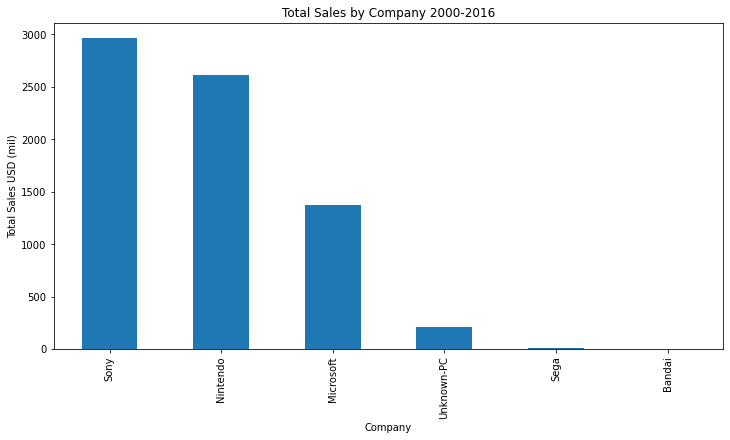

In [78]:
plt.figure(figsize=(12,6))
df.groupby('platform_company')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales by Company 2000-2016')
plt.xlabel("Company")
plt.ylabel("Total Sales USD (mil)")
plt.show()

- PS2 platform is leading in sales. 
- Sony is leading in sales
- Nintendo is second leading in sales
- Microsoft is third leading sales with X360 is its top product

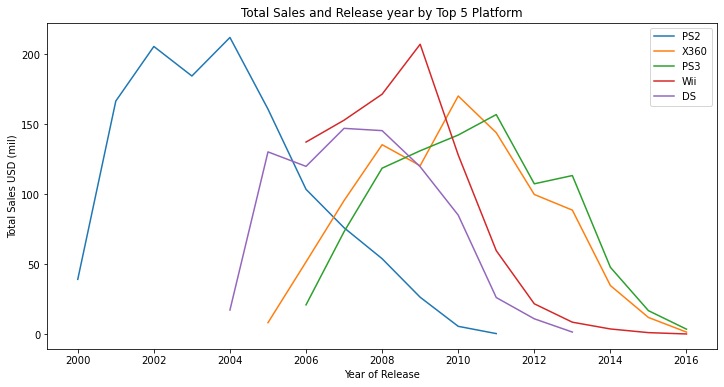

In [79]:
plt.figure(figsize=(12,6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales USD (mil)')
plt.title('Total Sales and Release year by Top 5 Platform')
for i in top10_platform[0:5]:
    sns.lineplot(data=df.loc[df['platform']==i].groupby(['year_of_release'])['total_sales'].sum(), label=i)
    plt.legend()
plt.show()

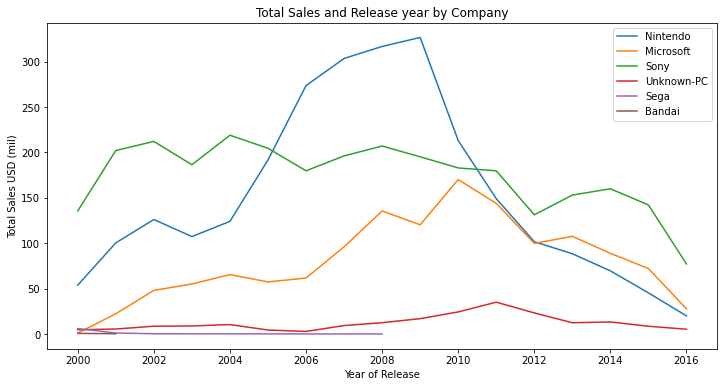

In [80]:
plt.figure(figsize=(12,6))
plt.xlabel('Year of Release')
plt.ylabel('Total Sales USD (mil)')
plt.title('Total Sales and Release year by Company')
for i in df['platform_company'].unique().tolist():
    sns.lineplot(data=df.loc[df['platform_company']==i].groupby(['year_of_release'])['total_sales'].sum(), label=i)
    plt.legend()
plt.show()

- Sega and Bandai are not released and not selling long ago. Bandai merged with Sega in 1997. Sega with the Dreamcast DC stopped production of new hardware console in 2001 and focused on making games for another console. 
- PC games have stable sales over the period.
- Nintendo was very popular in 2008 and dominate the market, it's shrinking after 2008 
- Microsoft is growing since 2006. in 2010 it catched and followed the market 
- Sony was very popular and stable over period
- All console platform and company seemed in decline and in the end of their life cycle. They need to develop more new product. 

### 5. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [81]:
top5 = top10_platform[0:5]
df_top5 = df[df['platform'].isin(top5)]
df_top5

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,Nintendo
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52,Nintendo
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77,Nintendo
6,New Super Mario Bros.,DS,2006,platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80,Nintendo
7,Wii Play,Wii,2006,misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91,Nintendo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,sports,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01,Nintendo
16704,Plushees,DS,2008,simulation,0.01,0.00,0.00,0.00,<NA>,NaN,E,0.01,Nintendo
16709,SCORE International Baja 1000: The Official Game,PS2,2008,racing,0.00,0.00,0.00,0.00,<NA>,NaN,NaN,0.00,Sony
16710,Samurai Warriors: Sanada Maru,PS3,2016,action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN,0.01,Sony


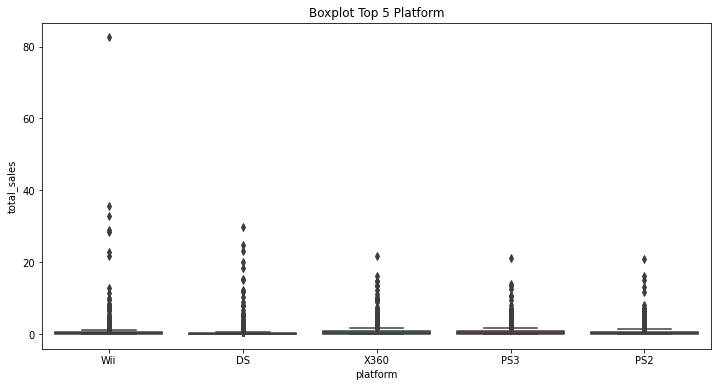

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top5, x='platform',y='total_sales')
plt.title('Boxplot Top 5 Platform')
plt.show()

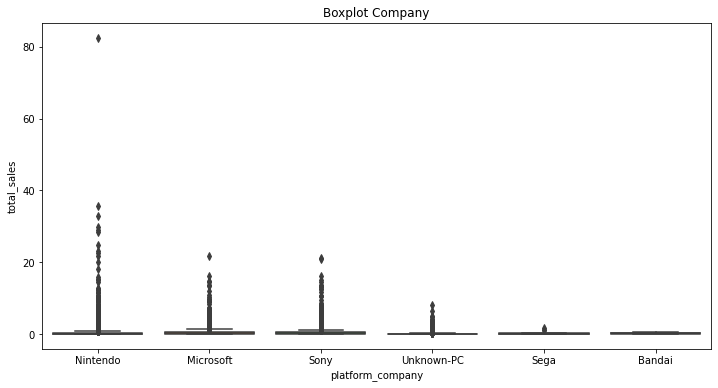

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='platform_company',y='total_sales')
plt.title('Boxplot Company')
plt.show()

There are extreme values and it's very hard to see the boxplot

In [84]:
df_top5.loc[df['total_sales']> 40]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54,Nintendo


Wii Sports is best selling platform game and it's revolutionary technology at that time.

Using IQR method to remove outliers

In [85]:
Q1 = df['total_sales'].quantile(0.25)
Q3 = df['total_sales'].quantile(0.75)
IQR = Q3 - Q1
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

Q1:  0.05
Q3:  0.44
IQR:  0.39
min:  0
max:  1.025


In [86]:
df_no_outliers = df[(df['total_sales'] >= bottom_cutoff) & (df['total_sales'] <= top_cutoff)]

In [87]:
df_top5_no_outliers = df[(df['platform'].isin(top5)) & (df['total_sales'] >= bottom_cutoff) & (df['total_sales'] <= top_cutoff)]

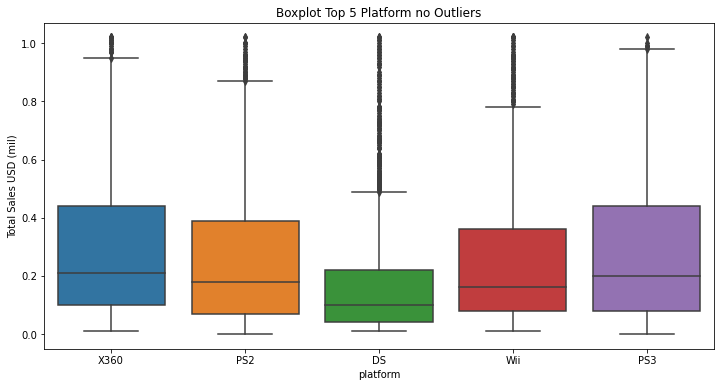

In [88]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top5_no_outliers, x='platform',y='total_sales')
plt.ylabel("Total Sales USD (mil)")
plt.title('Boxplot Top 5 Platform no Outliers')
plt.show()

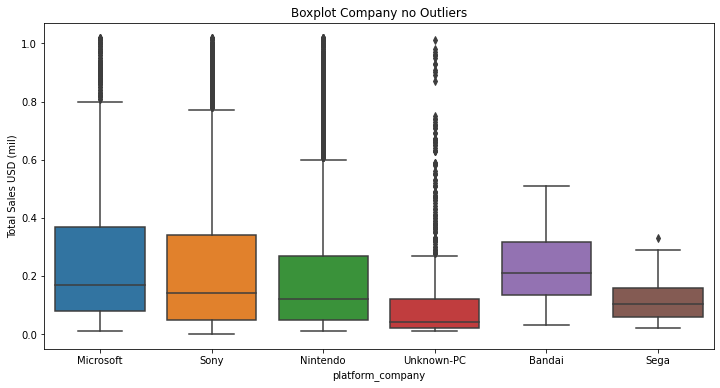

In [89]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_no_outliers, x='platform_company',y='total_sales')
plt.ylabel("Total Sales USD (mil)")
plt.title('Boxplot Company no Outliers')
plt.show()

- Microsoft is selling the most

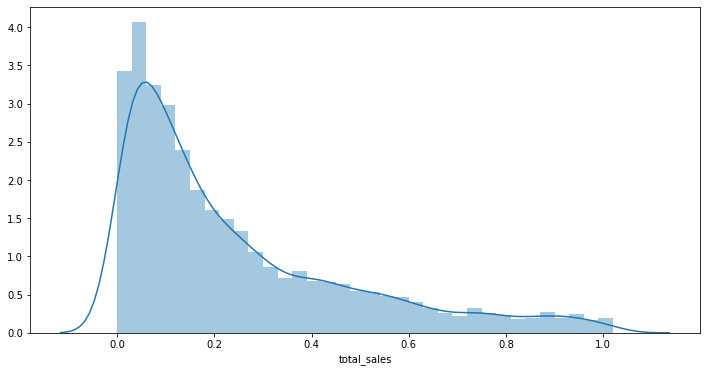

In [90]:
plt.figure(figsize=(12,6))
sns.distplot(df_top5_no_outliers['total_sales'])
plt.show()

- The distribution is right skewed (positive skewness) , which means the mean is higher than the median. It means we have some games with much higher sales than other games. 

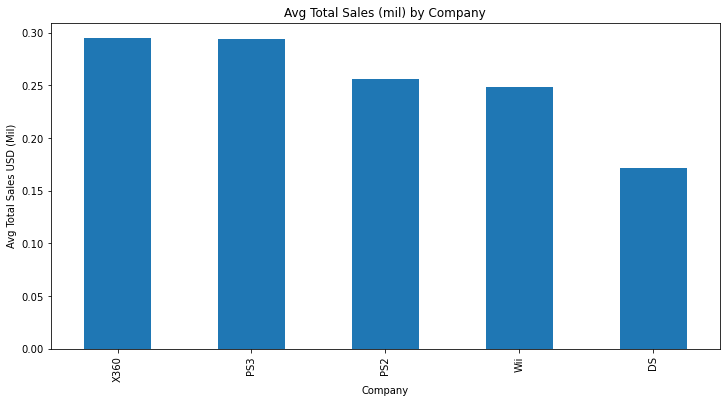

In [264]:
plt.figure(figsize=(12,6))
df_top5_no_outliers.groupby(['platform'])['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Avg Total Sales (mil) by Company')
plt.xlabel("Company")
plt.ylabel("Avg Total Sales USD (Mil)")
plt.show()

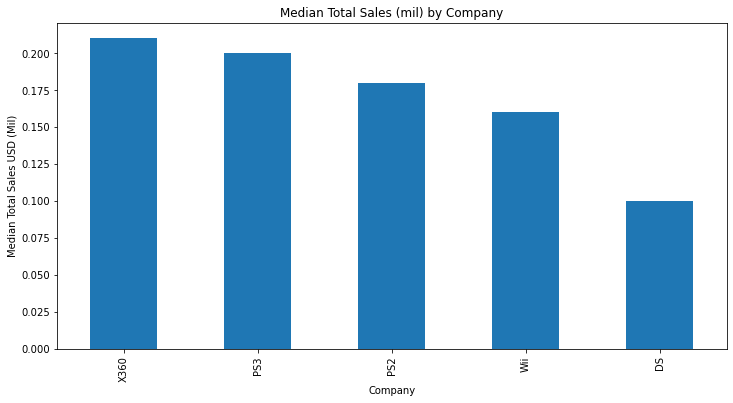

In [263]:
plt.figure(figsize=(12,6))
df_top5_no_outliers.groupby(['platform'])['total_sales'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median Total Sales (mil) by Company')
plt.xlabel("Company")
plt.ylabel("Median Total Sales USD (Mil)")
plt.show()

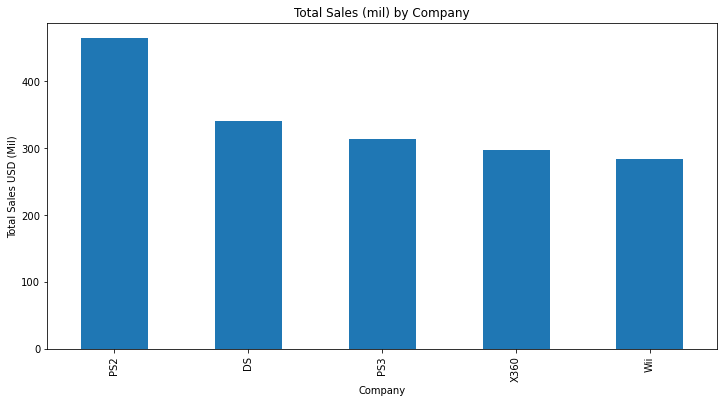

In [266]:
plt.figure(figsize=(12,6))
df_top5_no_outliers.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales (mil) by Company')
plt.xlabel("Company")
plt.ylabel("Total Sales USD (Mil)")
plt.show()

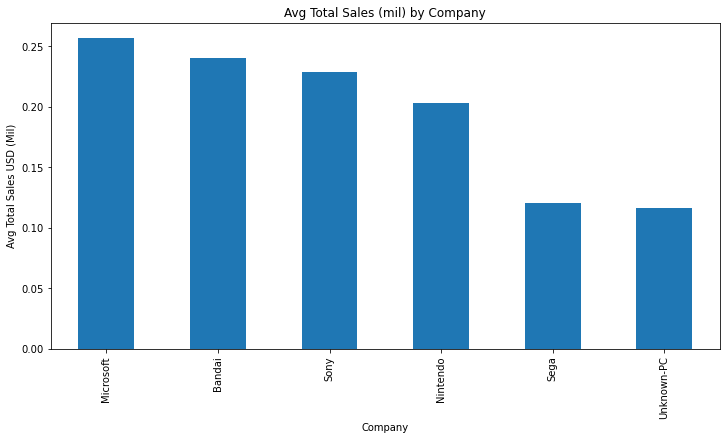

In [93]:
plt.figure(figsize=(12,6))
df_no_outliers.groupby(['platform_company'])['total_sales'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Avg Total Sales (mil) by Company')
plt.xlabel("Company")
plt.ylabel("Avg Total Sales USD (Mil)")
plt.show()

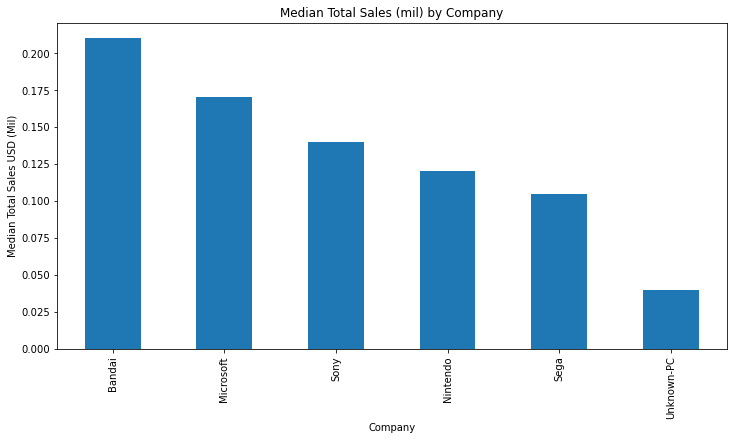

In [94]:
plt.figure(figsize=(12,6))
df_no_outliers.groupby(['platform_company'])['total_sales'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median Total Sales (mil) by Company')
plt.xlabel("Company")
plt.ylabel("Median Total Sales USD (Mil)")
plt.show()

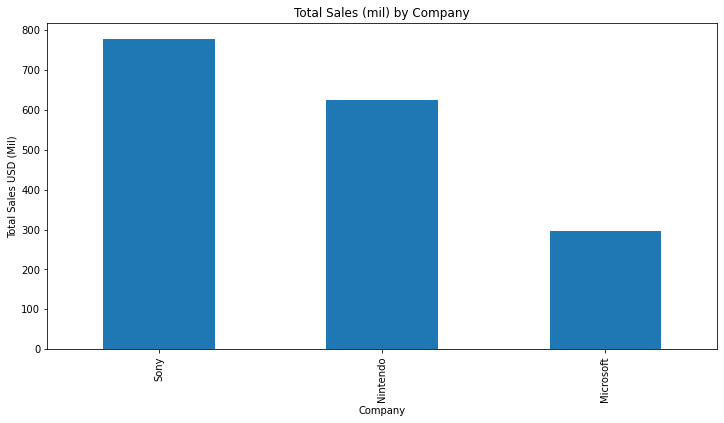

In [265]:
plt.figure(figsize=(12,6))
df_top5_no_outliers.groupby(['platform_company'])['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Sales (mil) by Company')
plt.xlabel("Company")
plt.ylabel("Total Sales USD (Mil)")
plt.show()

- Bandai and Sega are no longer sell, so we can take them out of analysis. 
- Microsoft has the most total average sales and total median sales. With PC make the least total sales. 
- PS2 and Sony has the most total sales and the most revenue. 

### 6.Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

I choose PS2 since it's the most popular video games platform and the most total sales platform

In [106]:
ps2 = df[df['platform']=='PS2']
ps2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
17,Grand Theft Auto: San Andreas,PS2,2004,action,9.43,0.40,0.41,10.57,95,9.0,M,20.81,Sony
24,Grand Theft Auto: Vice City,PS2,2002,action,8.41,5.49,0.47,1.78,95,8.7,M,16.15,Sony
28,Gran Turismo 3: A-Spec,PS2,2001,racing,6.85,5.09,1.87,1.16,95,8.4,E,14.97,Sony
38,Grand Theft Auto III,PS2,2001,action,6.99,4.51,0.30,1.30,97,8.5,M,13.10,Sony
48,Gran Turismo 4,PS2,2004,racing,3.01,0.01,1.10,7.53,89,8.5,E,11.65,Sony


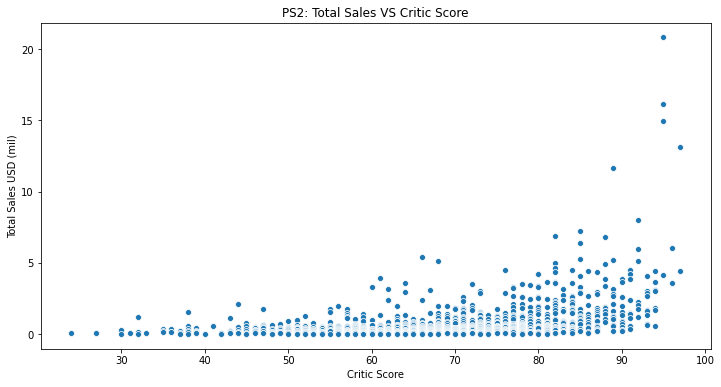

In [108]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=ps2, x="critic_score", y="total_sales")
plt.title('PS2: Total Sales VS Critic Score')
plt.xlabel("Critic Score")
plt.ylabel("Total Sales USD (mil)")
plt.show()

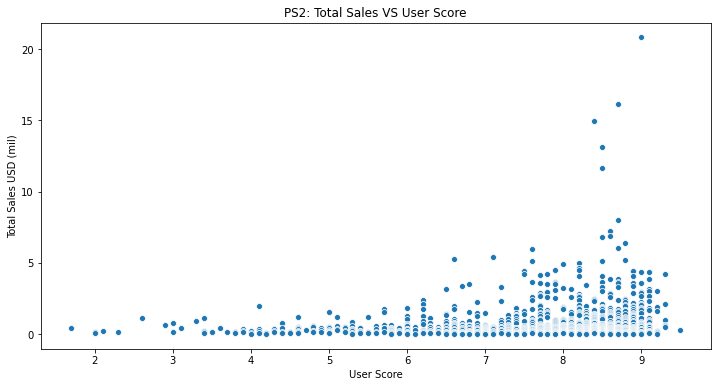

In [109]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=ps2, x="user_score", y="total_sales")
plt.title('PS2: Total Sales VS User Score')
plt.xlabel("User Score")
plt.ylabel("Total Sales USD (mil)")
plt.show()

In [118]:
ps2['user_score'].corr(ps2['total_sales'])

0.17505502770383727

In [116]:
ps2['critic_score'] = ps2['critic_score'].astype('float')

In [119]:
ps2['critic_score'].corr(ps2['total_sales'])

0.39253647544509035

In [117]:
ps2.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.154542,-0.205740,-0.105095,0.007861,-0.101062,-0.095040,-0.159505
na_sales,-0.154542,1.000000,0.664111,0.202004,0.566716,0.395324,0.172342,0.922023
eu_sales,-0.205740,0.664111,1.000000,0.228208,0.305354,0.300186,0.129374,0.784544
jp_sales,-0.105095,0.202004,0.228208,1.000000,0.176649,0.218858,0.149472,0.402724
other_sales,0.007861,0.566716,0.305354,0.176649,1.000000,0.210862,0.074949,0.714223
critic_score,-0.101062,0.395324,0.300186,0.218858,0.210862,1.000000,0.565841,0.392536
user_score,-0.095040,0.172342,0.129374,0.149472,0.074949,0.565841,1.000000,0.175055
total_sales,-0.159505,0.922023,0.784544,0.402724,0.714223,0.392536,0.175055,1.000000


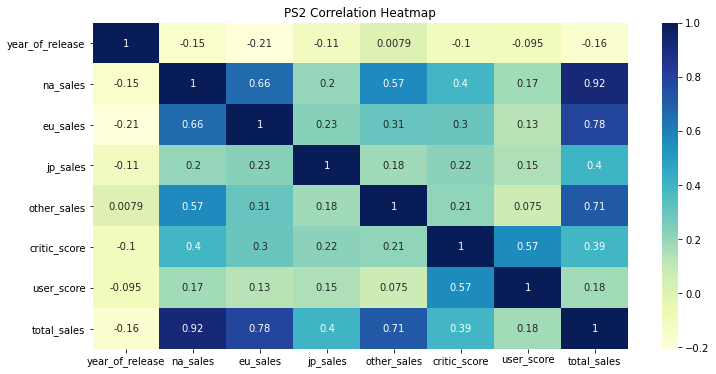

In [125]:
plt.figure(figsize=(12,6))
plt.title('PS2 Correlation Heatmap')
sns.heatmap(ps2.corr(), annot=True, cmap="YlGnBu")
plt.show()

There is more positive correlation between critic score and total sales than user score and total sales. Games with higher critic score have higher total sales.

### 7. Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Games that have multiple platform

In [173]:
df_multi = df.groupby(['name'])['platform'].nunique().to_frame().reset_index()
df_multi = df_multi.loc[df_multi['platform']>1]
df_multi

,name,platform
2,Frozen: Olaf's Quest,2
16,007: Quantum of Solace,6
17,007: The World is not Enough,2
30,11eyes: CrossOver,2
36,18 Wheeler: American Pro Trucker,2
...,...,...
9687,iCarly,2
9688,iCarly 2: iJoin The Click!,2
9692,nail'd,2
9693,pro evolution soccer 2011,6


There is 2548 games that have multiple platform

In [179]:
len(df_multi)/ len(df['name'].unique()) * 100

26.26533347077621

There are 26% games that develop for multiple platforms.

In [196]:
df.loc[df['name'].isin(df_multi['name'])]['platform'].value_counts()

PS3     1029
PS2     1017
X360     983
Wii      666
XB       573
DS       520
PC       468
GC       408
PSP      378
PS4      321
XOne     224
GBA      209
PSV      203
3DS      138
WiiU     100
PS        51
N64       19
GB         5
DC         5
Name: platform, dtype: int64

Playstation games seems popular to be develop for multiple platform

Top 10 games developed in multiple platforms sorted by number of platform

In [199]:
df.groupby(['name'])['platform'].nunique().sort_values(ascending=False).head(10)

name
Need for Speed: Most Wanted                10
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Terraria                                    8
FIFA 15                                     8
LEGO Jurassic World                         8
FIFA Soccer 13                              8
The LEGO Movie Videogame                    8
LEGO Star Wars II: The Original Trilogy     8
Name: platform, dtype: int64

Top 10 games developed in multiple platforms for different company

In [200]:
df.groupby(['name'])['platform_company'].nunique().sort_values(ascending=False).head(10)

name
The Sims 2                                                            4
CSI: Fatal Conspiracy                                                 4
The Sims                                                              4
Call of Duty: Black Ops II                                            4
Tom Clancy's Splinter Cell: Blacklist                                 4
Juiced 2: Hot Import Nights                                           4
The Amazing Spider-Man 2 (2014)                                       4
NBA 2K13                                                              4
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    4
Call of Duty: Ghosts                                                  4
Name: platform_company, dtype: int64

Total sales games with multiple platform

In [190]:
df_multi_sales = df.loc[df['name'].isin(df_multi['name'])].groupby(['name','platform']).agg({'total_sales':'sum'})
df_multi_sales

total_sales
name                         platform             
 Frozen: Olaf's Quest        3DS              0.59
                             DS               0.51
007: Quantum of Solace       DS               0.13
                             PC               0.02
                             PS2              0.43
...                                            ...
pro evolution soccer 2011    PSP              0.80
                             Wii              0.22
                             X360             0.60
uDraw Studio: Instant Artist Wii              0.17
                             X360             0.02

[7314 rows x 1 columns]

Total sales games with multiple platform with total sales more than 7 mil

In [206]:
df_multi_sales[df_multi_sales['total_sales']>7]

total_sales
name                                   platform             
Battlefield 3                          PS3              7.17
                                       X360             7.32
Call of Duty 4: Modern Warfare         X360             9.32
Call of Duty: Advanced Warfare         PS4              7.66
Call of Duty: Black Ops                PS3             12.63
                                       X360            14.62
Call of Duty: Black Ops 3              PS4             14.63
                                       XOne             7.39
Call of Duty: Black Ops II             PS3             13.79
                                       X360            13.68
Call of Duty: Ghosts                   PS3              9.36
                                       X360            10.24
Call of Duty: Modern Warfare 2         PS3             10.61
                                       X360            13.47
Call of Duty: Modern Warfare 3         PS3             13.33
                                       X360            14.73
Call of Duty: World at War             X360             7.38
FIFA 16                                PS4              8.58
FIFA 17                                PS4              7.60
FIFA Soccer 13                         PS3              8.17
Fallout 4                              PS4              7.17
Grand Theft Auto III                   PS2             13.10
Grand Theft Auto IV                    PS3             10.50
                                       X360            11.00
Grand Theft Auto V                     PS3             21.05
                                       PS4             12.62
                                       X360            16.27
Grand Theft Auto: Liberty City Stories PSP              7.68
Grand Theft Auto: San Andreas          PS2             20.81
Grand Theft Auto: Vice City            PS2             16.15
Halo 2                                 XB               8.48
Just Dance 3                           Wii             10.12
Mario & Sonic at the Olympic Games     Wii              8.00
Minecraft                              X360             9.18
Need for Speed Underground             PS2              7.20
Star Wars Battlefront (2015)           PS4              7.98
Super Smash Bros. for Wii U and 3DS    3DS              7.55
The Elder Scrolls V: Skyrim            X360             8.79
The Legend of Zelda: Twilight Princess Wii              7.16
The Sims 3                             PC               8.01

In [203]:
# Games with 10 different platform which is Need for Speed: Most Wanted
df.loc[df['name']=='Need for Speed: Most Wanted'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
253,Need for Speed: Most Wanted,PS2,2005,racing,2.03,1.79,0.08,0.47,82,9.1,T,4.37,Sony
523,Need for Speed: Most Wanted,PS3,2012,racing,0.71,1.46,0.06,0.58,<NA>,NaN,NaN,2.81,Sony
1190,Need for Speed: Most Wanted,X360,2012,racing,0.62,0.78,0.01,0.15,83,8.5,T,1.56,Microsoft
1591,Need for Speed: Most Wanted,X360,2005,racing,1.00,0.13,0.02,0.10,83,8.5,T,1.25,Microsoft
1998,Need for Speed: Most Wanted,XB,2005,racing,0.53,0.46,0.00,0.05,83,8.8,T,1.04,Microsoft
2048,Need for Speed: Most Wanted,PSV,2012,racing,0.33,0.45,0.01,0.22,<NA>,NaN,NaN,1.01,Sony
3581,Need for Speed: Most Wanted,GC,2005,racing,0.43,0.11,0.00,0.02,80,9.1,T,0.56,Nintendo
5972,Need for Speed: Most Wanted,PC,2005,racing,0.02,0.23,0.00,0.04,82,8.5,T,0.29,Unknown-PC
6273,Need for Speed: Most Wanted,WiiU,2013,racing,0.13,0.12,0.00,0.02,<NA>,NaN,NaN,0.27,Nintendo
6410,Need for Speed: Most Wanted,DS,2005,racing,0.24,0.01,0.00,0.02,45,6.1,E,0.27,Nintendo


In [204]:
# Games with multiple platform for different company which is The Sims 2
df.loc[df['name']=='The Sims 2'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
1416,The Sims 2,PSP,2005,simulation,0.49,0.55,0.0,0.33,65,6.9,T,1.37,Sony
2211,The Sims 2,DS,2005,simulation,0.81,0.05,0.0,0.07,70,6.1,E10+,0.93,Nintendo
2551,The Sims 2,PS2,2005,simulation,0.67,0.03,0.0,0.11,75,4.4,T,0.81,Sony
4934,The Sims 2,GBA,2005,simulation,0.28,0.10,0.0,0.01,58,7.5,E10+,0.39,Nintendo
5457,The Sims 2,GC,2005,simulation,0.26,0.07,0.0,0.01,73,8.3,T,0.34,Nintendo
5943,The Sims 2,PC,2004,simulation,0.02,0.24,0.0,0.04,90,8.8,T,0.30,Unknown-PC
6687,The Sims 2,XB,2005,simulation,0.19,0.05,0.0,0.01,75,7.1,T,0.25,Microsoft


In [215]:
df_multi_sales[df_multi_sales['total_sales'] == df_multi_sales['total_sales'].max()]

,,total_sales
name,platform,
Grand Theft Auto V,PS3,21.05


In [207]:
# Games with multiple platform for different company that has the highest total sales which is Grand Theft Auto V
df.loc[df['name']=='Grand Theft Auto V'].sort_values(by='total_sales', ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_company
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,Sony
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,Microsoft
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,Sony
165,Grand Theft Auto V,XOne,2014,action,2.81,2.19,0.00,0.47,97,7.9,M,5.47,Microsoft
1730,Grand Theft Auto V,PC,2015,action,0.39,0.69,0.00,0.09,96,7.9,M,1.17,Unknown-PC


Sony dominated the total sales for games with different platforms

### 8. Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [236]:
df_genre = df.groupby('genre')['total_sales'].sum().to_frame().sort_values(by='total_sales', ascending=False).reset_index()
df_genre

,genre,total_sales
0,action,1526.16
1,sports,1130.92
2,shooter,912.70
3,role-playing,731.22
4,misc,718.35
5,racing,561.06
6,platform,494.42
7,simulation,335.41
8,fighting,311.90
9,adventure,183.74


Text(0, 0.5, 'Total Sales')

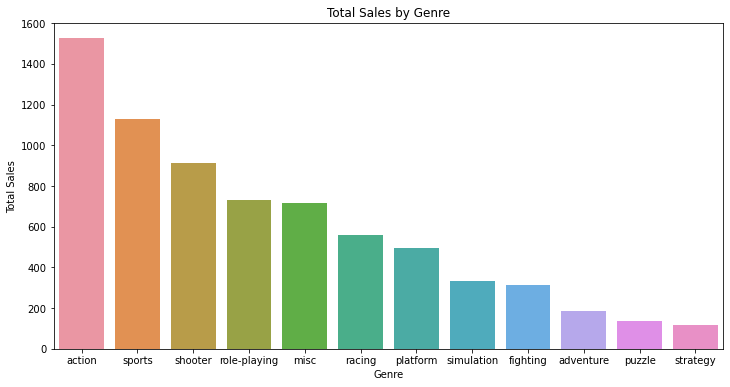

In [243]:
plt.figure(figsize=(12,6))
sns.barplot( data=df_genre, x="genre", y="total_sales")
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales')

In [257]:
df.loc[df['genre']=='action'].groupby(['platform_company'])['total_sales'].agg(['sum','count'])

,sum,count
platform_company,,
Microsoft,321.46,554
Nintendo,399.72,1086
Sega,1.18,2
Sony,777.51,1277
Unknown-PC,26.29,160


In [258]:
df.loc[df['genre']=='action'].groupby(['platform'])['total_sales'].agg(['sum','count'])

,sum,count
platform,,
3DS,57.84,187
DC,1.18,2
DS,111.29,332
GB,3.72,3
GBA,54.13,162
GC,37.11,98
N64,9.89,11
PC,26.29,160
PS,32.11,49


- The most profitable genre are action, sports and shooter. 
- The less profitable genre are adventure, puzzle and strategy.
- Sony are the most profitable company for action genre.
- There are lot of number of action genre games for Sony and Nintendo.
- PS3, PS3 and X360 are the most profitable platform for action genre.
- There are lot of number of action genre games for PS2 and PS3.

### Conclusion

- PS2 is the most profitable platform and leading in sales.
- Sony is the most profitable company and leading in sales.
- Action is the most profitable genre.
- Sony dominated the total sales for games with different platforms.
- 26% games are developed for multiple platforms.
- Nintendo is second leading in sales.
- Microsoft is third leading sales with X360 is its top product.
- Games with higher critic score have higher total sales.


- There are many games released between 2006 to 2011 with the peak in 2008 and 2009
- It takes about 9 years for new platform to fade and it took around 5 to 6 years for next console platform to appear.
- PS2, PSP, X360 are the most active life cycle platform (11 years active before fade)
- All console platform and company seemed in decline and in the end of their life cycle. They need to develop more new product.

## Step 4. Regional Analysis <a class="anchor" id="region"></a>

For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

In [276]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    display(df.pivot_table(index='platform',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31


,eu_sales
platform,
PS2,332.63
PS3,327.21
X360,268.32
Wii,258.32
DS,188.41


,jp_sales
platform,
DS,175.00
PS2,137.54
3DS,100.62
PS3,79.41
PSP,75.88


- The most popular platform in NA is X360. 
- The most popular platform in EU are PS2 and PS3.
- The most popular platform in JP is DS.

In [306]:
for region in regions:
    display(df.pivot_table(index='platform_company',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
platform_company,
Nintendo,1334.99
Sony,1257.24
Microsoft,870.92
Unknown-PC,63.93
Sega,2.53


,eu_sales
platform_company,
Sony,926.56
Nintendo,657.36
Microsoft,379.56
Unknown-PC,121.34
Sega,0.79


,jp_sales
platform_company,
Nintendo,446.07
Sony,350.73
Microsoft,14.02
Sega,3.96
Bandai,0.96


- The most popular company in NA are Nintendo and Sony.
- The most popular company in EU is Sony.
- The most popular company in JP is Nintendo.

In [277]:
for region in regions:
    display(df.pivot_table(index='genre',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
genre,
action,752.27
sports,589.39
shooter,495.23
misc,365.27
role-playing,282.30


,eu_sales
genre,
action,466.58
sports,339.58
shooter,294.02
misc,196.71
racing,192.02


,jp_sales
genre,
role-playing,241.71
action,132.23
misc,85.43
sports,75.88
platform,55.27


- The most popular genre in NA is Action.
- The most popular genre in EU is Action.
- The most popular genre in JP is Role Playing.

In [278]:
for region in regions:
    display(df.pivot_table(index='rating',values=region,aggfunc='sum').sort_values(by=region,ascending=False).head())

,na_sales
rating,
E,1249.26
M,727.80
T,709.86
E10+,345.50
EC,1.53


,eu_sales
rating,
E,690.61
M,472.40
T,392.71
E10+,183.33
AO,0.61


,jp_sales
rating,
E,189.91
T,131.01
M,57.84
E10+,40.20
AO,0.00


- E is game for Everyone. E is also the most popular rating in NA, EU and JP.

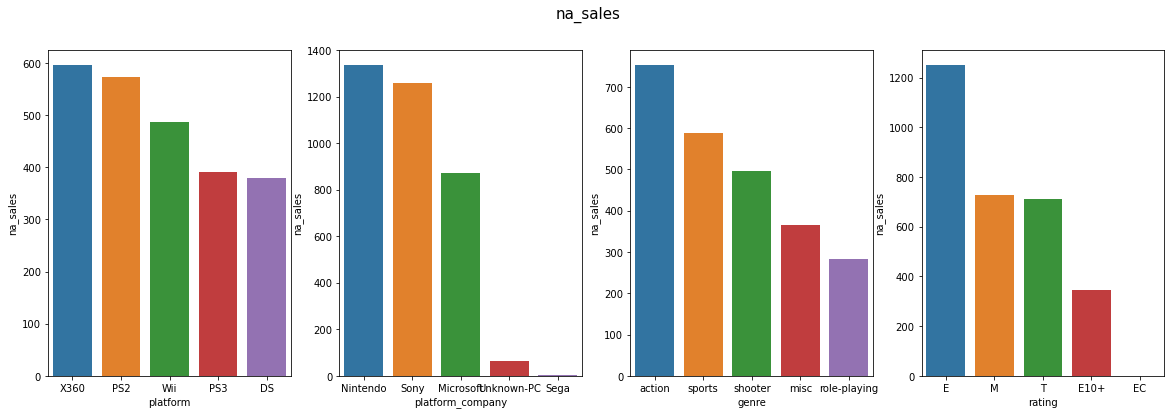

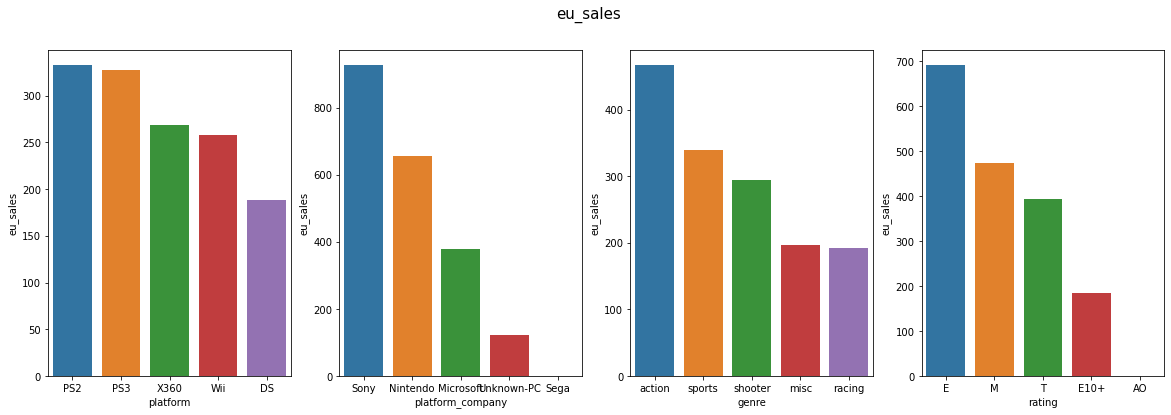

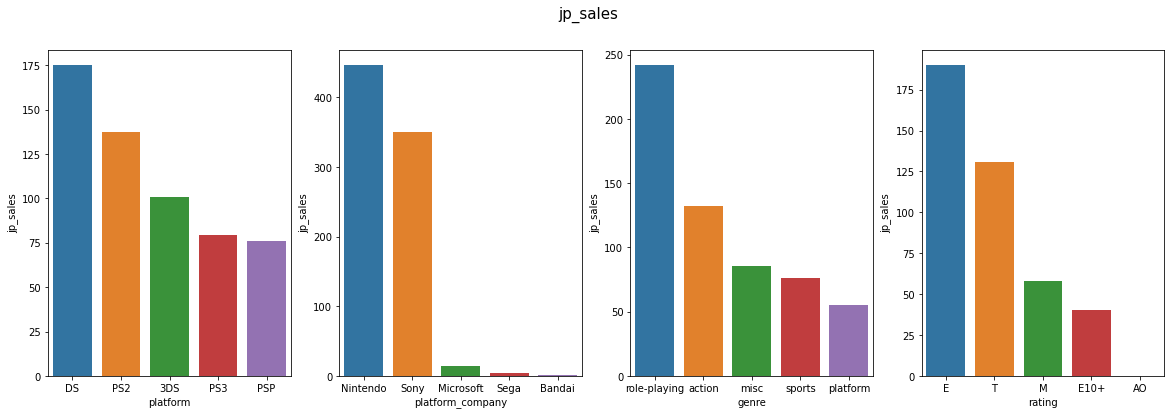

In [288]:
for region in regions:
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    for pivot, ax in zip(list(['platform','platform_company','genre','rating']),axes.flatten()[:4]):
        df_region = df.pivot_table(index=pivot, values=region, aggfunc='sum').sort_values(by=region, ascending=False).reset_index().head()
        sns.barplot(data=df_region, x=pivot, y=region, ax=ax)
        fig.suptitle(region, fontsize=15)
    plt.show()

### Conclusion

**NA**
- The most popular platform in NA is X360, followed by PS2.
- The most popular company in NA are Nintendo and Sony.
- The most popular genre in NA is Action.

**EU**
- The most popular platform in EU are PS2 and PS3.
- The most popular company in EU is Sony.
- The most popular genre in EU is Action.

**JP**
- The most popular platform in JP is DS, followed bt PS2.
- The most popular company in JP is Nintendo.
- Microsoft is not popular in JP.
- PC in not profitable platform in JP.
- The most popular genre in JP is Role Playing.

**E Rating**
- E is the most popular rating in NA, EU and JP. It's reasonable since E is game for Everyone.

## Step 5. Hypotheses Testing <a class="anchor" id="hypotest"></a>

- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

Set the alpha threshold value yourself.

Explain:
- How you formulated the null and alternative hypotheses
- What significance level you chose to test the hypotheses, and why

### Average user ratings of the Xbox One and PC platforms are the same. <a class="anchor" id="hypo1"></a>

- H0 (Null Hypothesis): Average User Ratings of XBox One == Average User Ratings PC
- HA (Alternative Hypothesis): Average User Ratings of XBox One != Average User Ratings PC
- Confidence Level: 95% (Alpha 5%)

In [322]:
alpha = .05

sample_xone = df.loc[df['platform']=='XOne']['user_score'].dropna()
sample_pc = df.loc[df['platform']=='PC']['user_score'].dropna()

In [323]:
st.levene(sample_xone, sample_pc, center='mean')

LeveneResult(statistic=2.8155784012062326, pvalue=0.09369510613597538)

The p-value of the test is more than the threshold value of 0.05 and hence, the sample groups have equal variance. Equal Variance is True

In [326]:
results = st.ttest_ind(sample_xone,sample_pc, equal_var=True)

print('sample xone mean: ', sample_xone.mean())
print('sample pc mean: ',sample_pc.mean())
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

sample xone mean:  6.52142857142857
sample pc mean:  7.0340599455041035
p-value:  3.750185722417337e-05
We reject the null hypothesis


With confidence level of 0.05 the average score of users for Xbox One platform is not equal to the users score for PC.

### Conclusion

- With Levene Test, the sample group have equal variance since the pvalue of Levene test is more than threshold of 0.05.
- With confidence level 95%, we rejected the null hypothesis, so the average user ratings of XBox One is not equal to the users score of PC.
- User Score PC has more average user rating than XBox One.

### Average user ratings for the Action and Sports genres are different. <a class="anchor" id="hypo2"></a>

- H0 (Null Hypothesis): Average User Ratings of Action games == Average User Ratings of Sports games
- HA (Alternative Hypothesis): Average User Ratings of Action games != Average User Ratings of Sports games
- Confidence Level: 95% (Alpha 5%)

In [329]:
alpha = .05

sample_action = df.loc[df['genre']=='action']['user_score'].dropna()
sample_sports = df.loc[df['genre']=='sports']['user_score'].dropna()

In [330]:
st.levene(sample_action, sample_sports, center='mean')

LeveneResult(statistic=22.399196104230146, pvalue=2.3223997171012595e-06)

the p-value of the test is less than the threshold value of 0.05 and hence, the sample groups do not have equal variance. equal variance = False

In [332]:
results = st.ttest_ind(sample_action,sample_sports, equal_var=False)

print('sample action mean: ', sample_action.mean())
print('sample sports mean: ',sample_sports.mean())
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

sample action mean:  7.045648512071863
sample sports mean:  6.947729379054682
p-value:  0.10115120156606783
We can't reject the null hypothesis


### Conclusion

- With Levene Test, the sample group have equal variance since the pvalue of Levene test is more than threshold of 0.05.
- With confidence level 95%, we can't reject the null hypothesis, so the average user ratings of XBox One is equal to the users ratings of sports games.
- User Score Action has more average user rating than XBox One.

## Step 6. Overall conclusion <a class="anchor" id="allconclusion"></a>